In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import fbeta_score, accuracy_score, recall_score, precision_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import json
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format

In [2]:
# dfreco = pd.read_csv("recommendations.csv")
# dfreco.to_parquet("recommendations.parquet")

In [3]:
dfreco = pd.read_parquet("recommendations.parquet")

In [4]:
dfreco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.2+ GB


In [5]:
dfreco.describe()

,app_id,helpful,funny,hours,user_id,review_id
count,"41,154,794","41,154,794","41,154,794","41,154,794","41,154,794","41,154,794"
mean,"603,272",3,1,101,"7,450,576","20,577,396"
std,"472,923",47,29,176,"4,010,685","11,880,366"
min,10,0,0,0,0,0
25%,"253,940",0,0,8,"4,287,256","10,288,698"
50%,"435,150",0,0,27,"7,546,446","20,577,396"
75%,"933,110",0,0,99,"10,968,771","30,866,095"
max,"2,253,290","36,212","28,109","1,000","14,306,063","41,154,793"


In [6]:
dfgame = pd.read_csv("games.csv")

In [7]:
dfgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [8]:
dfgame.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,"50,872","50,872","50,872","50,872","50,872","50,872"
mean,"1,055,224",77,"1,824",9,9,6
std,"610,325",18,"40,074",12,12,19
min,10,0,10,0,0,0
25%,"528,738",67,19,1,1,0
50%,"986,085",81,49,5,5,0
75%,"1,524,895",91,206,11,12,0
max,"2,599,300",100,"7,494,460",300,300,90


In [9]:
dfuser = pd.read_csv("users.csv")

In [10]:
dfuser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 327.4 MB


In [11]:
dfuser.describe()

,user_id,products,reviews
count,"14,306,064","14,306,064","14,306,064"
mean,"7,153,032",116,3
std,"4,129,805",244,8
min,0,0,0
25%,"3,576,516",23,1
50%,"7,153,032",55,1
75%,"10,729,547",127,3
max,"14,306,063","32,214","6,045"


In [12]:
dfmeta = pd.read_json('games_metadata.json', lines=True)

In [13]:
dfmeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50872 non-null  int64 
 1   description  50872 non-null  object
 2   tags         50872 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [14]:
dfmeta.describe()

,app_id
count,"50,872"
mean,"1,055,224"
std,"610,325"
min,10
25%,"528,738"
50%,"986,085"
75%,"1,524,895"
max,"2,599,300"


In [15]:
dfmeta.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [16]:
genres = {x for l in dfmeta.tags for x in l}

In [17]:
len(genres)

441

In [24]:
dfagg = dfreco[['user_id', ' 'is_recommended']].groupby(['user_id']).sum().sort_values('is_recommended', ascending=False)  

In [25]:
dfagg

,is_recommended
user_id,
5112758,3920
5669734,3479
11553593,3392
5390510,3023
1353327,2262
...,...
1686507,0
8844396,0
1686509,0


In [18]:
dfuser.sort_values('reviews', ascending=False)

,user_id,products,reviews
4803549,11764552,7898,6045
9965497,5112758,1226,4152
13741354,11656130,1807,3840
12041089,5669734,4737,3479
8734053,11553593,1919,3392
...,...,...,...
9221759,2280413,15,0
9221775,2282576,43,0
9221788,2287075,13,0
9221803,2289518,8,0


In [22]:
df = pd.read_csv('secondary_data.csv', sep=';')
df.columns = df.columns.str.replace("-", "_")

In [23]:
def binarize_p_or_e(cls):
    if cls =='p': 
        return True 
    else: 
        return False

In [24]:
df['class'] = df['class'].apply(lambda x: binarize_p_or_e(x))
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [25]:

def get_best_tree(X, y, max_depth=3, random_state=42):
    model = DecisionTreeClassifier(class_weight='balanced', random_state=random_state)
    f2s = {}     
    for i in range(3, max_depth+1):
        model = DecisionTreeClassifier(class_weight='balanced', max_depth=i, splitter='random', random_state=random_state)
        model.fit(X, y)
        y_pred = model.predict(X_test)
        f2s[f"{i}"] = float(recall_score(y_test, y_pred, zero_division=0))

    md = int(max(f2s, key=f2s.get))
    
    print("Best Recall: " + "%f" % f2s[str(md)])
    model = DecisionTreeClassifier(class_weight='balanced', max_depth=md, splitter='random', random_state=random_state) 
    model.fit(X, y)
    return model


model = get_best_tree(X_train, y_train, 100)
model.get_params()
    
    

Best Recall: 1.000000


{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'random'}

In [26]:
fi = pd.DataFrame(model.feature_importances_, columns=['importance'])
fi['feature'] = X.columns[fi.index]
fi.sort_values(by='importance', ascending=False)[:20]

,importance,feature
55,0.054032,gill_color_w
81,0.041793,stem_color_w
57,0.038702,stem_root_b
39,0.036949,gill_attachment_p
17,0.035653,cap_surface_s
36,0.034994,gill_attachment_d
4,0.031448,cap_shape_c
35,0.029724,gill_attachment_a
60,0.028882,stem_root_r
43,0.027206,gill_spacing_d


In [27]:
y_pred = model.predict(X_test)
pd.DataFrame(y_pred).value_counts()

0    
True     10274
False     8047
Name: count, dtype: int64

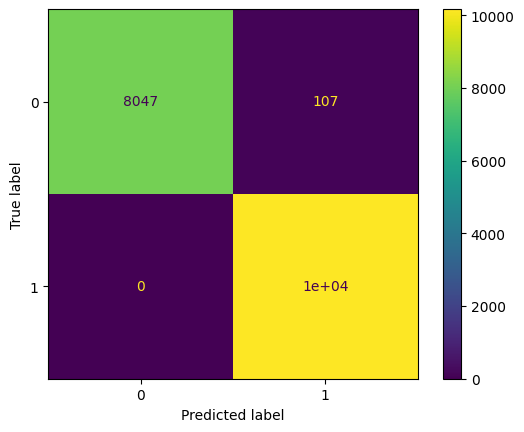

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [29]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1)}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1)}")
print(f"F2: {fbeta_score(y_test, y_pred, beta=2, zero_division=1)}")

Accuracy: 0.9941597074395503
Precision: 0.9895853611057037
Recall: 1.0
F2: 0.9978995720623454


In [30]:


clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)


In [31]:
y_pred = clf.predict(X_test)
pd.DataFrame(y_pred).value_counts()

0    
True     10167
False     8154
Name: count, dtype: int64

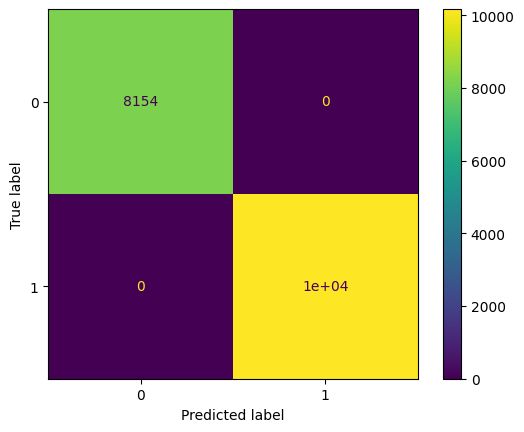

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [33]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1)}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1)}")
print(f"F2: {fbeta_score(y_test, y_pred, beta=2, zero_division=1)}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F2: 1.0


In [36]:
clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [37]:
y_pred = clf.predict(X_test)
pd.DataFrame(y_pred).value_counts()

0    
True     10167
False     8154
Name: count, dtype: int64

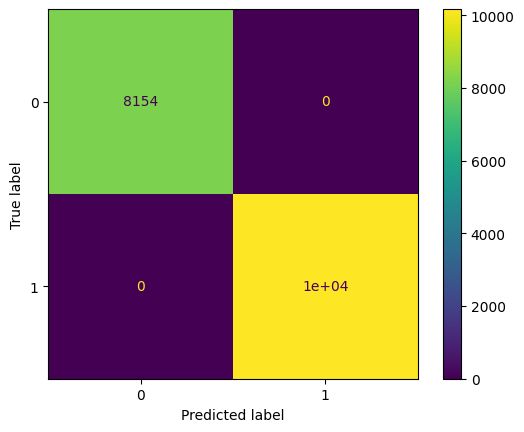

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [39]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1)}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1)}")
print(f"F2: {fbeta_score(y_test, y_pred, beta=2, zero_division=1)}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F2: 1.0
